Demographics Data:
       ID  Amzius   Ugis  Svoris    KMI
0  NCF201    26.0  168.7    73.2  25.56
1  NCF202    28.0  171.0    55.0  18.30
2  NCF203    22.0  170.0    73.2  25.40
3  NCF204    34.0  174.0    59.0  19.50
4  NCF205    20.0  161.3    61.8  23.20

Alpha Metrics Data:
                                      Participant_ID  Alpha_Mean_Power  \
0  NCF_201_R2256_imp_ch_flt1-45_flt50_rejectedart...          0.572594   
1  NCF_202_R2256_imp_ch_flt1-45_flt50_rejectedart...          0.626204   
2  NCF_204_R2256_imp_ch_flt1-45_flt50_rejectedart...          0.139308   
3  NCF_205_R2256_imp_ch_flt1-45_flt50_rejectedart...          0.955722   
4  NCF_206_R2256_imp_ch_flt1-45_flt50_rejectedart...          0.955403   

   Alpha_Sum_Power  
0      3607.343018  
1      3945.085938  
2       877.643555  
3      6021.050293  
4      6019.036133  


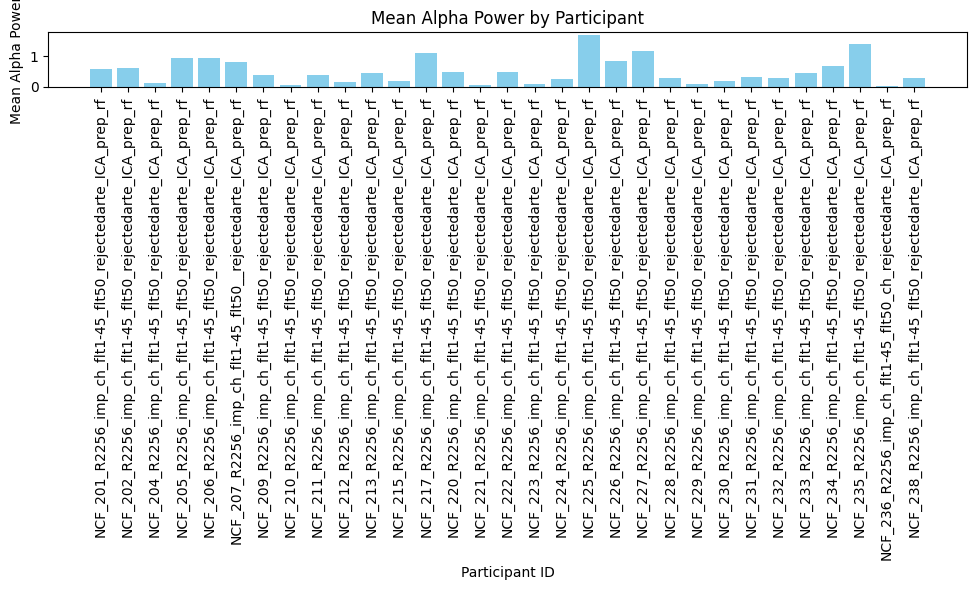

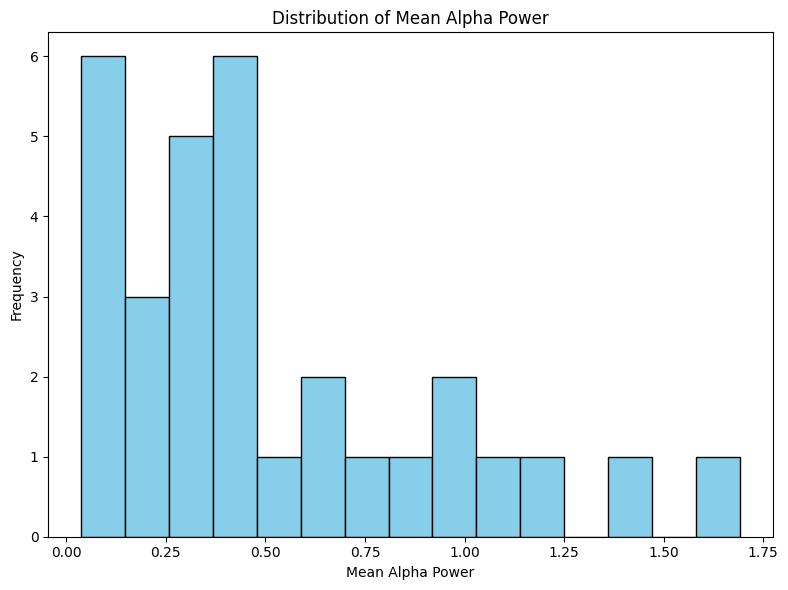

Results saved to eeg_analysis_results.xlsx.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

demographics_path = 'dem_info.xlsx' 
demographics_df = pd.read_excel(demographics_path)


print("Demographics Data:")
print(demographics_df.head())

mat_path = r'psd_and_freq_for_FOOOF_moterys_NFC.mat' 


participant_ids = []
alpha_means = []
alpha_sums = []

mat_data = loadmat(mat_path)

psd_data = mat_data['psd']

def pad_arrays(freq, spect):
    if len(freq) > len(spect):
        spect = np.pad(spect, (0, len(freq) - len(spect)), mode='constant', constant_values=0)
    elif len(spect) > len(freq):
        freq = np.pad(freq, (0, len(spect) - len(freq)), mode='constant', constant_values=0)
    return freq, spect

for i in range(psd_data.shape[1]):
    participant_data = psd_data[0, i]
    
    
    freq = participant_data['freq'].squeeze()  
    spect = participant_data['spect'].squeeze()  
    participant_id = participant_data['ID'].squeeze() 
    
    
    freq, spect = pad_arrays(freq, spect)
    
    
    alpha_mask = (freq >= 8) & (freq <= 13)
    alpha_freq = freq[alpha_mask]
    alpha_power = spect[alpha_mask]
    
    
    alpha_mean = np.mean(alpha_power)
    alpha_sum = np.sum(alpha_power)
    
   
    participant_ids.append(participant_id)
    alpha_means.append(alpha_mean)
    alpha_sums.append(alpha_sum)


alpha_df = pd.DataFrame({
    'Participant_ID': participant_ids,
    'Alpha_Mean_Power': alpha_means,
    'Alpha_Sum_Power': alpha_sums})


alpha_df['Participant_ID'] = alpha_df['Participant_ID'].astype(str)


print("\nAlpha Metrics Data:")
print(alpha_df.head())


plt.figure(figsize=(10, 6))
plt.bar(alpha_df['Participant_ID'], alpha_df['Alpha_Mean_Power'], color='skyblue')
plt.title('Mean Alpha Power by Participant')
plt.xlabel('Participant ID')
plt.ylabel('Mean Alpha Power')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('alpha_mean_power.png')
plt.show()


plt.figure(figsize=(8, 6))
plt.hist(alpha_means, bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Mean Alpha Power')
plt.xlabel('Mean Alpha Power')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('alpha_power_distribution.png')
plt.show()


output_path = 'eeg_analysis_results.xlsx'
with pd.ExcelWriter(output_path) as writer:
    demographics_df.to_excel(writer, sheet_name='Demographics', index=False)
    alpha_df.to_excel(writer, sheet_name='Alpha Metrics', index=False)

print(f"Results saved to {output_path}.")


In [11]:
pip install eeglabio

In [17]:
from scipy.io import loadmat

file_path = r"C:\Users\donat\Pratybos naujas\NCF_201_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep.set"
eeg_data = loadmat(file_path, simplify_cells=True)
print(eeg_data.keys())
print(eeg_data['chanlocs'])


dict_keys(['__header__', '__version__', '__globals__', 'setname', 'filename', 'filepath', 'subject', 'group', 'condition', 'session', 'comments', 'nbchan', 'trials', 'pnts', 'srate', 'xmin', 'xmax', 'times', 'data', 'icaact', 'icawinv', 'icasphere', 'icaweights', 'icachansind', 'chanlocs', 'urchanlocs', 'chaninfo', 'ref', 'event', 'urevent', 'eventdescription', 'epoch', 'epochdescription', 'reject', 'stats', 'specdata', 'specicaact', 'splinefile', 'icasplinefile', 'dipfit', 'history', 'saved', 'etc', 'run', 'roi', 'datfile'])
[{'labels': 'Fp1', 'type': 'EEG', 'theta': -17.926000000000002, 'radius': 0.5149888888888888, 'X': 80.78401376909139, 'Y': 26.133014404070234, 'Z': -4.00108454195971, 'sph_theta': 17.926000000000002, 'sph_phi': -2.6979999999999893, 'sph_radius': 85, 'urchan': 1, 'ref': array([], dtype='<U1')}, {'labels': 'Fpz', 'type': 'EEG', 'theta': 0, 'radius': 0.5066888888888889, 'X': 84.98123361344625, 'Y': -0.0, 'Z': -1.7860385037488253, 'sph_theta': -0.0, 'sph_phi': -1.2039

Type of signal for channel Channel 1: <class 'numpy.ndarray'>


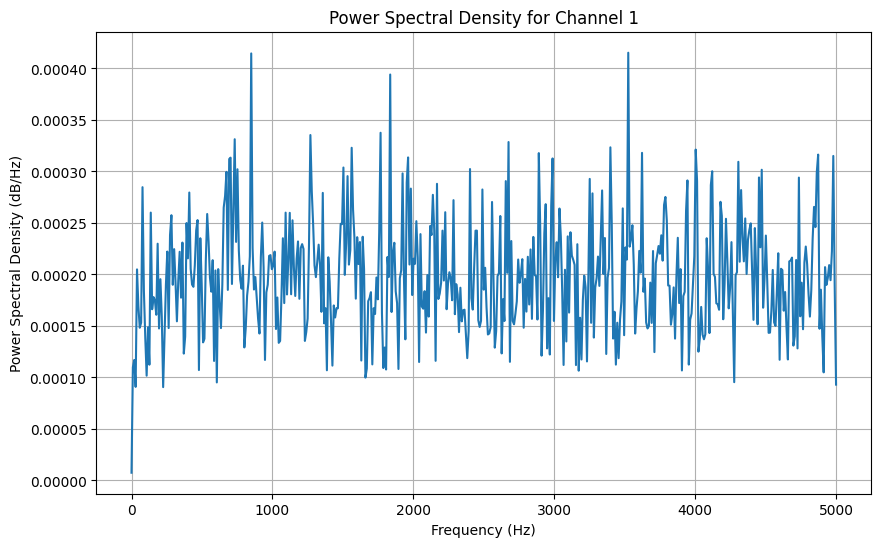

Type of signal for channel Channel 2: <class 'numpy.ndarray'>


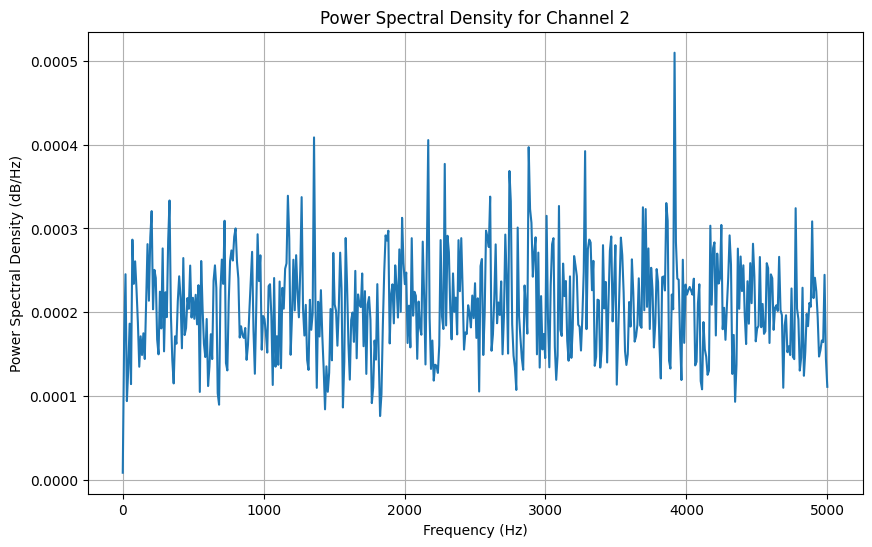

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Example signal data (replace with your actual data)
signals = [np.random.randn(10000), np.random.randn(10000)]  # Example signals as arrays
channel_names = ['Channel 1', 'Channel 2']  # Channel names
sampling_rate = 10000  # Example sampling rate (Hz)

# Compute the Power Spectral Density (PSD)
def compute_psd(signal, sampling_rate, nperseg=1024, noverlap=512):
    """
    Compute the Power Density Spectrum using scipy's spectrogram function.
    """
    # Ensure that the signal is a numeric array (in case it's a string or other non-numeric type)
    if isinstance(signal, str):
        raise ValueError("Signal must be a numeric array, not a string.")

    frequencies, times, Sxx = spectrogram(
        signal,
        fs=sampling_rate,
        nperseg=nperseg,
        noverlap=noverlap,
        scaling='density',
        mode='psd'
    )
    return frequencies, Sxx

# Function to plot the PSD
def plot_psd(frequencies, psd, channel_name):
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, psd)
    plt.title(f'Power Spectral Density for {channel_name}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.grid(True)
    plt.show()

# Loop through signals and compute & plot PSD for each channel
for i, signal in enumerate(signals):
    # Check and print the type of signal for debugging
    print(f"Type of signal for channel {channel_names[i]}: {type(signal)}")
    
    # Ensure the signal is a numeric array (in case it's loaded as a string)
    if isinstance(signal, str):
        raise ValueError(f"Signal for channel {channel_names[i]} is a string, but it must be a numeric array or list.")
    
    # Compute PSD
    frequencies, Sxx = compute_psd(signal, sampling_rate)
    
    # Average power spectral density across time
    psd = np.mean(Sxx, axis=1)
    
    # Plot the PSD
    plot_psd(frequencies, psd, channel_names[i])


Reading E:\Analysis\re-referenced\NCF\NCF_201_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep_rf.fdt
Reading 0 ... 44388  =      0.000 ...   173.391 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, ...
 chs: 62 EEG
 custom_ref_applied: False
 dig: 65 items (3 Cardinal, 62 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 62
 projs: []
 sfreq: 256.0 Hz
>


C:\Users\donat\AppData\Local\Temp\ipykernel_14380\4096087124.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


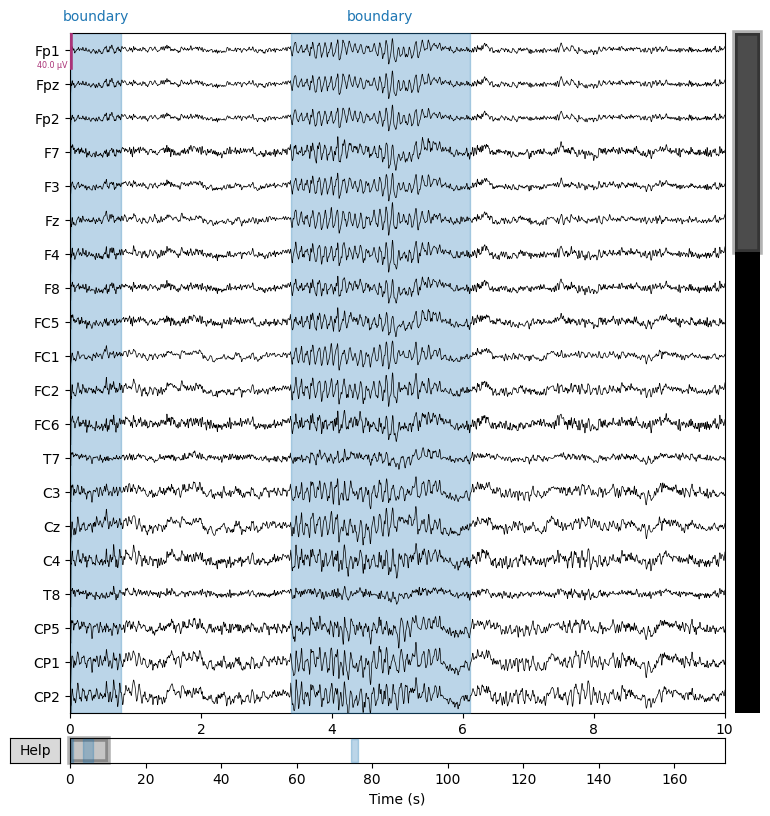

C:\Users\donat\AppData\Local\Temp\ipykernel_14380\4096087124.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


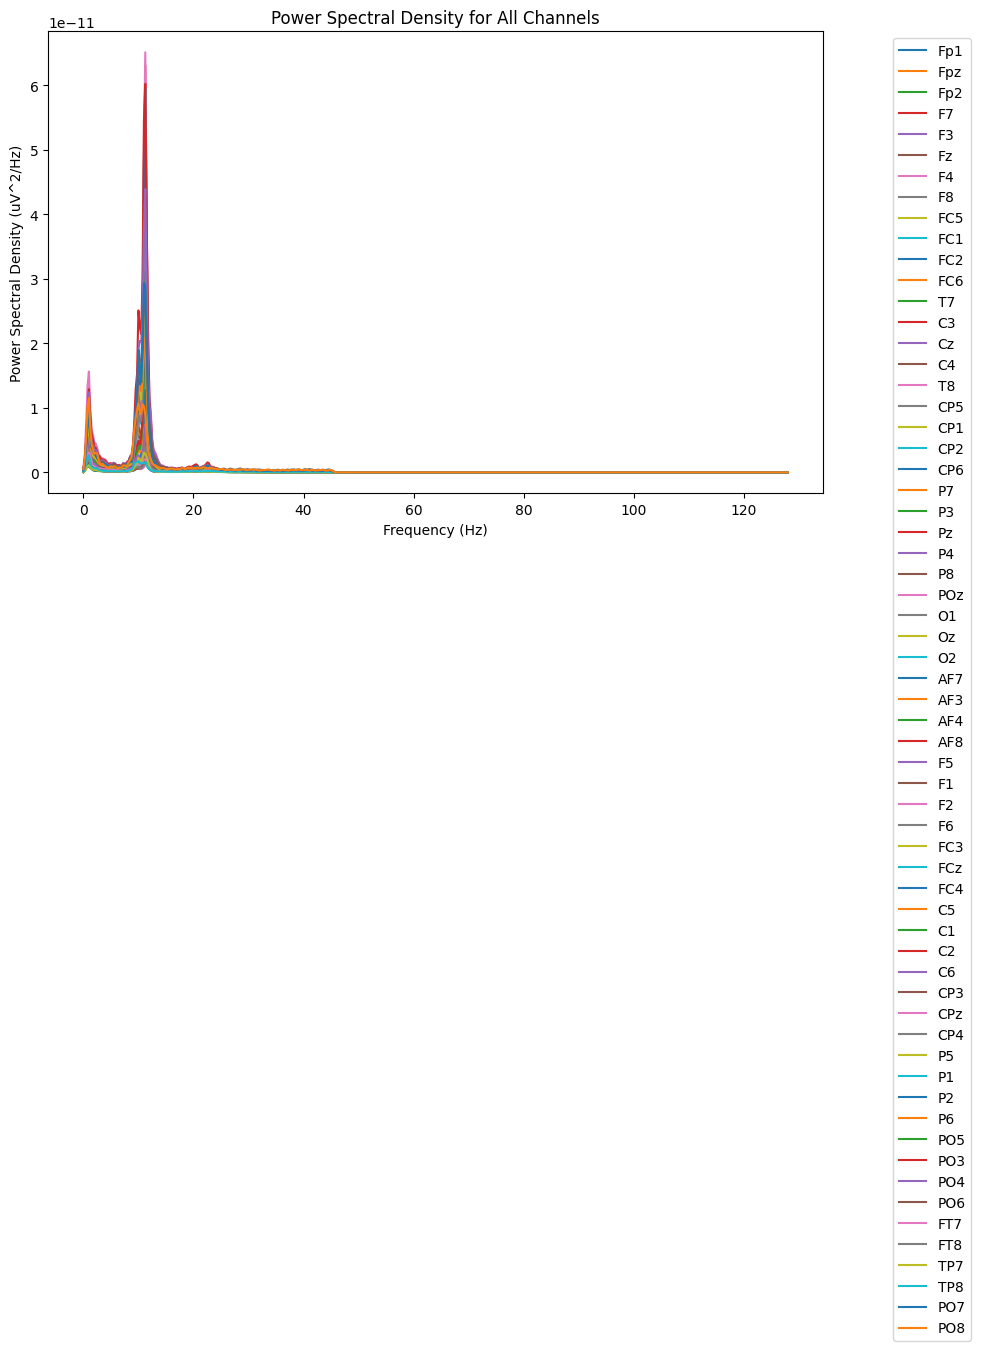

PSD data saved to E:\Analysis\psd_data.xlsx


In [26]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
# Path to your .set file
file_path = r"E:\Analysis\re-referenced\NCF\NCF_201_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep_rf.set"

# Load the EEG data
raw = mne.io.read_raw_eeglab(file_path, preload=True)

# Check the raw data summary
print(raw.info)

# Plot the raw EEG data
raw.plot()

# Export data as a NumPy array if needed
data, times = raw.get_data(return_times=True)  # Get signal values and time points



import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import welch

# Assume `raw` is already loaded as your EEG data (from MNE)
eeg_data = raw.get_data()  # Shape: (n_channels, n_samples)
sfreq = raw.info['sfreq']  # Sampling frequency

# Step 1: Compute PSD for all channels using Welch's method
nperseg = 1024  # Segment length for Welch's method
psds = []  # To store PSD for all channels
freqs = None

# Compute PSD for each channel
for i in range(eeg_data.shape[0]):
    f, Pxx = welch(eeg_data[i, :], fs=sfreq, nperseg=nperseg)
    
    if freqs is None:
        freqs = f  # Save frequencies once, as they are the same for all channels
    
    psds.append(Pxx)

# Convert the PSDs to a numpy array and transposition to match channels vs frequencies
psds = np.array(psds)

# Step 2: Plot Power Spectral Density for all channels
plt.figure(figsize=(10, 6))
for i in range(eeg_data.shape[0]):
    plt.plot(freqs, psds[i], label=raw.info['ch_names'][i])
    
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (uV^2/Hz)')
plt.title('Power Spectral Density for All Channels')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

# Step 3: Save PSDs to Excel for FOOOF analysis
# Create a DataFrame with PSD data
psd_df = pd.DataFrame(psds.T, columns=raw.info['ch_names'], index=freqs)

# Save to Excel
excel_file = r'E:\Analysis\psd_data.xlsx'
psd_df.to_excel(excel_file)

print(f"PSD data saved to {excel_file}")


Reading E:\Analysis\re-referenced\OC\OC_1_R2_ch256_flt1-45_flt50_rejectedarte_rch_imp_ICA_prep_rf.fdt
Reading 0 ... 45380  =      0.000 ...   177.266 secs...
Reading E:\Analysis\re-referenced\UID\UID_101_R2256_imp_ch_flt1-45_flt50_rejectedarte_rch_ICA_prep_rf.fdt
Reading 0 ... 42281  =      0.000 ...   165.160 secs...


C:\Users\donat\AppData\Local\Temp\ipykernel_14380\3383029666.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_14380\3383029666.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\donat\AppData\Local\Temp\ipykernel_14380\3383029666.py:63: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


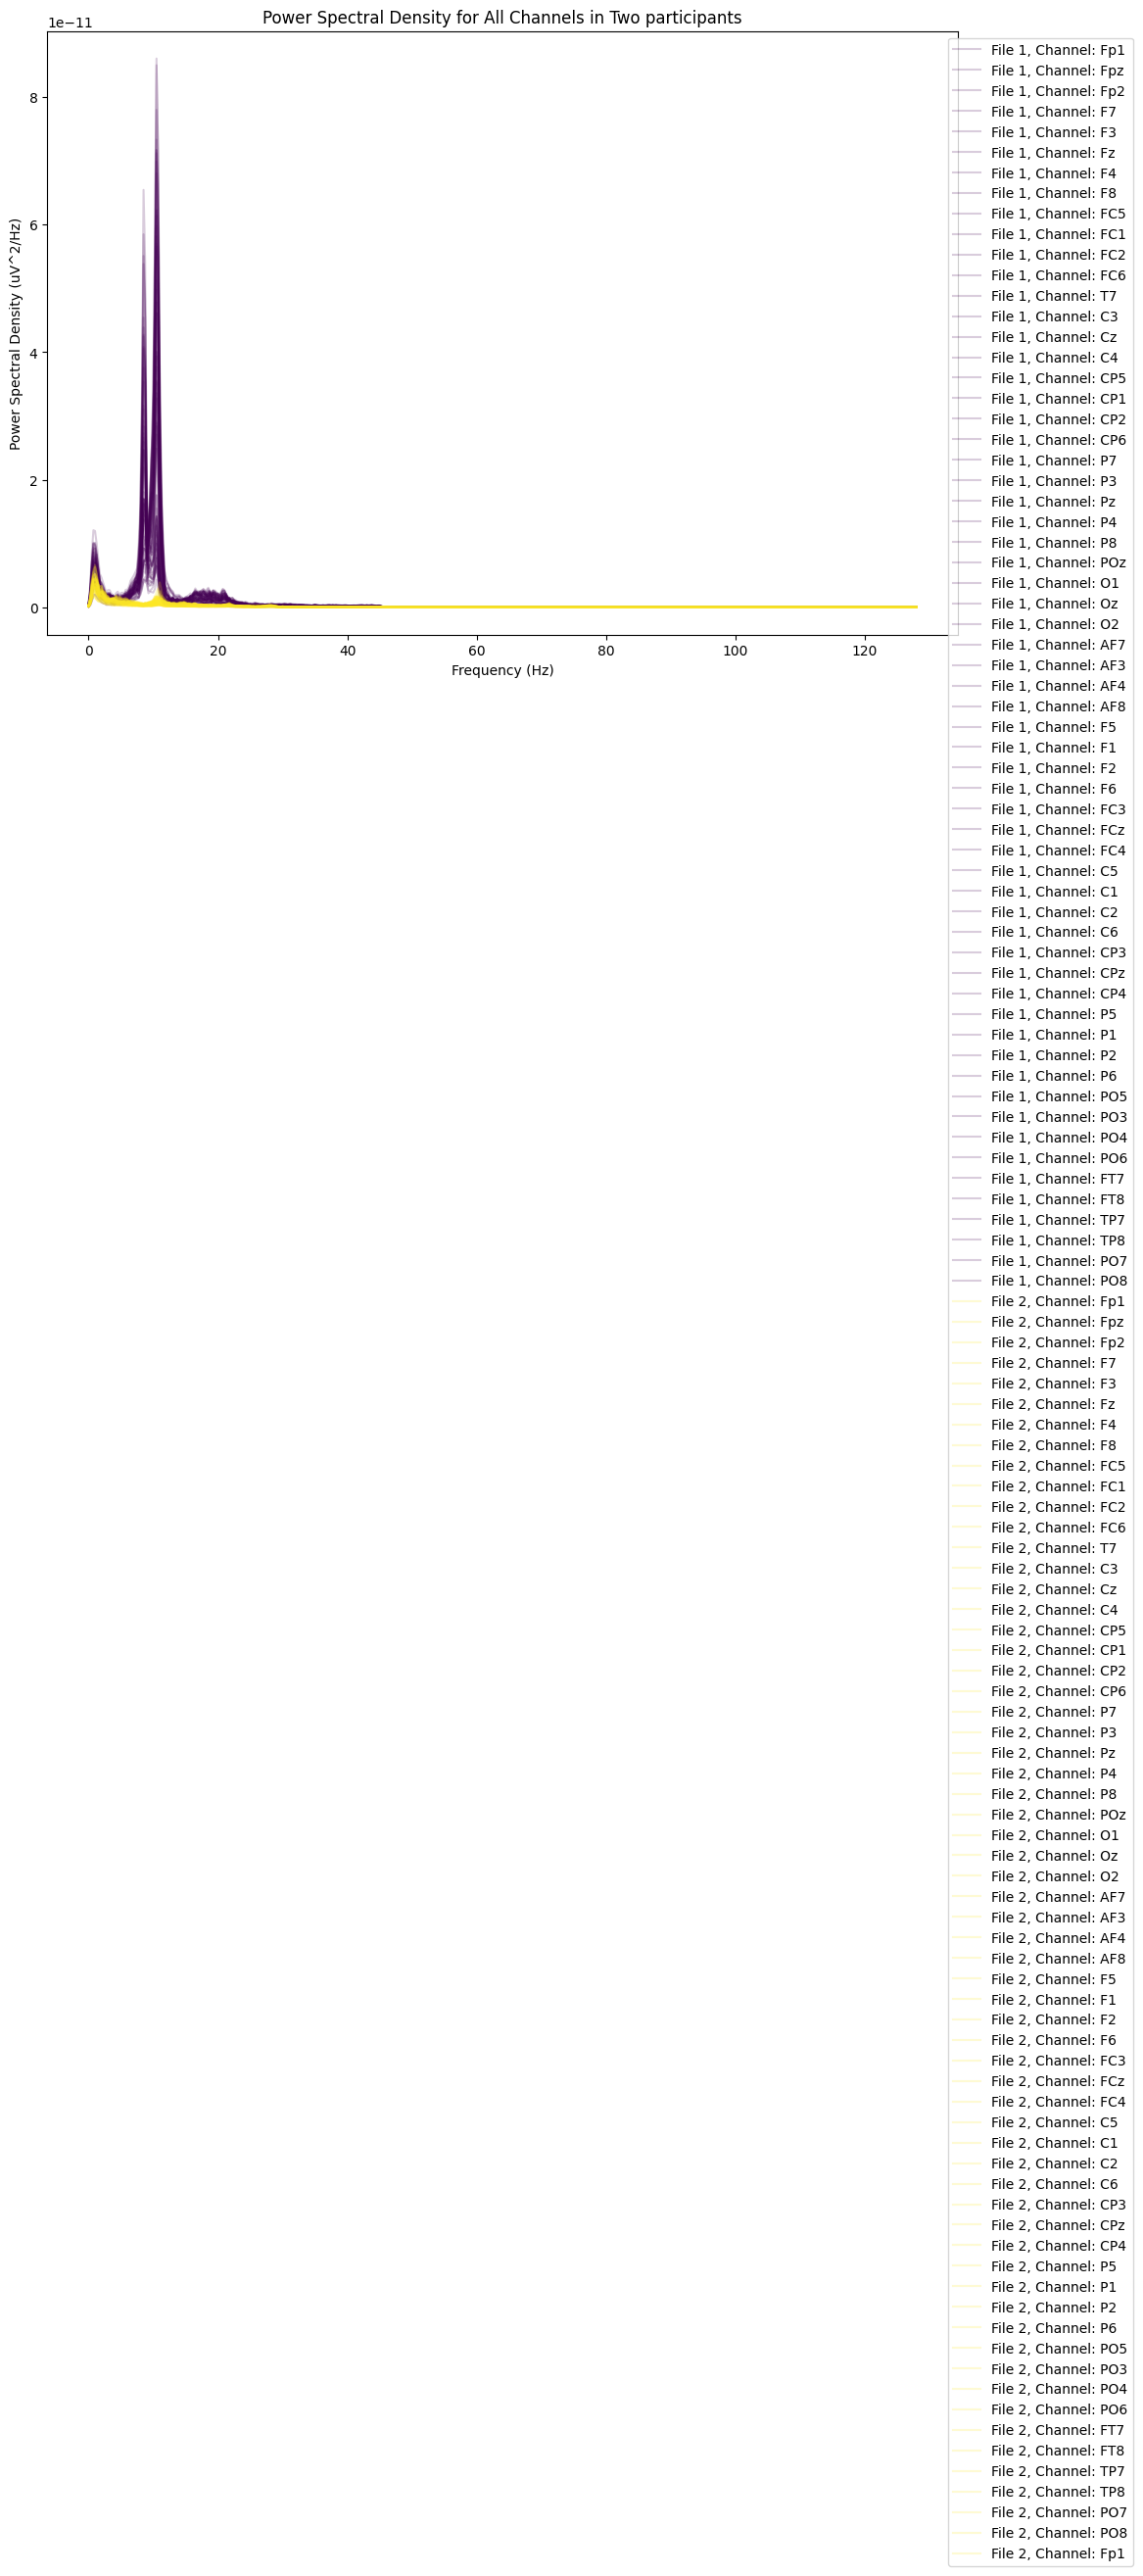

Combined PSD data saved to E:\Analysis\combined_psd_data.xlsx
Plot saved to E:\Analysis\psd_plot.png


In [91]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
import pandas as pd

# List of file paths (add as many files as you want to process)
file_paths = [
    r"E:\Analysis\re-referenced\OC\OC_1_R2_ch256_flt1-45_flt50_rejectedarte_rch_imp_ICA_prep_rf.set",
    r"E:\Analysis\re-referenced\UID\UID_101_R2256_imp_ch_flt1-45_flt50_rejectedarte_rch_ICA_prep_rf.set"  # Replace with your second file path
]

# Initialize a list to store PSD data and channel names for each file
all_psd_data = []
all_freqs = None
all_channel_names = []

# Define a list of colors (you can customize this list)
colors = plt.cm.viridis(np.linspace(0, 1, len(file_paths)))  # Color map from matplotlib

# Step 1: Loop through each file to compute the PSD
for file_idx, file_path in enumerate(file_paths):
    # Load the EEG data
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    
    # Get EEG data as a numpy array
    eeg_data = raw.get_data()  # Shape: (n_channels, n_samples)
    sfreq = raw.info['sfreq']  # Sampling frequency
    
    # Compute PSD using Welch's method for each channel
    psds = []
    for i in range(eeg_data.shape[0]):
        f, Pxx = welch(eeg_data[i, :], fs=sfreq, nperseg=1024)
        
        if all_freqs is None:
            all_freqs = f  # Frequencies are the same for all channels, save once
        
        psds.append(Pxx)
    
    # Convert the PSDs to a numpy array (channels x frequencies)
    psds = np.array(psds)
    
    # Store the results for this file
    all_psd_data.append(psds)
    all_channel_names.extend(raw.info['ch_names'])

# Step 2: Plot Power Spectral Density for all files and channels with different colors
plt.figure(figsize=(12, 8))

for file_idx, psds in enumerate(all_psd_data):
    # Get the color for this file
    color = colors[file_idx]
    
    for j in range(psds.shape[0]):
        # Plot PSD of each channel for this file with the specific color
        plt.plot(all_freqs, psds[j], label=f'File {file_idx+1}, Channel: {all_channel_names[j]}', 
                 color=color, alpha=0.2)  # Transparency added

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (uV^2/Hz)')
plt.title('Power Spectral Density for All Channels in Two participants')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()

# Save the plot as a PNG file
plot_filename = r'E:\Analysis\psd_plot.png'
plt.savefig(plot_filename, format='png')

# Show the plot
plt.show()

# Step 3: Save the combined PSD data to an Excel file for FOOOF analysis
# Combine all PSD data for all files into a single DataFrame
psd_df = pd.DataFrame(np.vstack(all_psd_data).T, columns=all_channel_names, index=all_freqs)

# Save to Excel
excel_file = r'E:\Analysis\combined_psd_data.xlsx'
psd_df.to_excel(excel_file)

print(f"Combined PSD data saved to {excel_file}")
print(f"Plot saved to {plot_filename}")



In [34]:
!pip install fooof

In [90]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from fooof import FOOOF
import pandas as pd

# Path to your .set file
file_path = r"E:\Analysis\re-referenced\NCF\NCF_201_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep_rf.set"

# Load the EEG data
raw = mne.io.read_raw_eeglab(file_path, preload=True)

# Filter the data (1-50 Hz bandpass filter)
raw.filter(l_freq=1.0, h_freq=50.0, fir_design='firwin')

# Get the data for PSD computation
data, times = raw.get_data(return_times=True)
sfreq = raw.info['sfreq']  # Sampling frequency
nperseg = 1024  # Segment length for Welch's method

# Define frequency range for fitting (3-40 Hz)
f_min, f_max = 3.0, 40.0

# Prepare an empty list to store results for all channels
all_psds = []
all_freqs = []
all_fits = []

# Compute PSD for each channel using Welch's method
for i in range(raw.info['nchan']):
    f, Pxx = welch(data[i, :], fs=sfreq, nperseg=nperseg)
    
    # Select the frequency range of interest (3-40 Hz)
    freq_range = (f >= f_min) & (f <= f_max)
    f_fit = f[freq_range]
    Pxx_fit = Pxx[freq_range]
    
    # Store PSD for each channel
    all_psds.append(Pxx_fit)
    all_freqs.append(f_fit)
    



    # Extract data and sampling frequency
    eeg_data = raw_data.get_data()
    sfreq = raw_data.info['sfreq']

    # Compute the Power Spectral Density (PSD)
    avg_data = eeg_data.mean(axis=0)
    frequencies, psd = welch(avg_data, fs=sfreq, nperseg=sfreq*2)  # 2-second window

    # Initialize FOOOF
    fm = FOOOF(peak_width_limits=[1, 12], aperiodic_mode='knee')

    # Fit the FOOOF model
    fm.fit(frequencies, psd)

    # Plot the fit
    fm.plot()

    # Extract the alpha peak
    alpha_peak = fm.get_params('peak')

    # Extract the 1/f slope (exponent)
    slope = fm.get_params('aperiodic', 'exponent')

    print("Alpha Peak:", alpha_peak)
    print("1/f Slope (Exponent):", slope)
else:
    print("File does not exist at the given path.")

# Plot the raw PSD for all channels along with the FOOOF fit components (periodic + aperiodic)
plt.figure(figsize=(15, 10))

for i in range(raw.info['nchan']):
    # Plot the raw PSD for the selected channel
    plt.plot(all_freqs[i], all_psds[i], label=f'PSD - {raw.info["ch_names"][i]}', alpha=0.7)

    # Plot the periodic component (alpha peaks)
    periodic = all_fits[i]['peak_params']
    for peak in periodic:
        amplitude, center, width = peak
        periodic_component = amplitude * np.exp(-((all_freqs[i] - center) ** 2) / (2 * width ** 2))
        plt.plot(all_freqs[i], periodic_component, label=f'{raw.info["ch_names"][i]} Peak at {center:.2f} Hz', linestyle='--')

    # Plot the aperiodic component (1/f slope)
    aperiodic = all_fits[i]['aperiodic_params']
    aperiodic_component = aperiodic[0] * (all_freqs[i] ** -aperiodic[1])
    plt.plot(all_freqs[i], aperiodic_component, label=f'{raw.info["ch_names"][i]} Aperiodic Component', color='red', linestyle='--')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (uV^2/Hz)')
plt.title(f'Power Spectral Density with FOOOF Fitting (3-40 Hz) for All Channels')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

# Save FOOOF fit results to Excel
fit_df = pd.DataFrame(all_fits)
excel_file = r'E:\Analysis\fooof_fit_results.xlsx'
fit_df.to_excel(excel_file)

print(f"FOOOF fit results saved to {excel_file}")


Reading E:\Analysis\re-referenced\NCF\NCF_201_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep_rf.fdt
Reading 0 ... 44388  =      0.000 ...   173.391 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\donat\AppData\Local\Temp\ipykernel_14380\1263730992.py:12: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NameError: name 'raw_data' is not defined

In [76]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from fooof import FOOOF

# Path to your .set file
file_path = r"E:\Analysis\re-referenced\NCF\NCF_201_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep_rf.set"

# Load the EEG data
raw = mne.io.read_raw_eeglab(file_path, preload=True)

# Check the raw data summary
print(raw.info)

# Compute the PSD using Welch's method
eeg_data = raw.get_data()  # Shape: (n_channels, n_samples)
sfreq = raw.info['sfreq']  # Sampling frequency
nperseg = 1024  # Segment length for Welch's method
psds = []  # To store PSD for all channels
freqs = None

# Compute PSD for each channel
for i in range(eeg_data.shape[0]):
    f, Pxx = welch(eeg_data[i, :], fs=sfreq, nperseg=nperseg)
    
    if freqs is None:
        freqs = f  # Save frequencies once, as they are the same for all channels
    
    psds.append(Pxx)

# Convert the PSDs to a numpy array and transpose to match channels vs frequencies
psds = np.array(psds)

# Choose the first channel for FOOOF fitting (can be adjusted)
channel_idx = 0

# Perform FOOOF model fitting on the PSD of the chosen channel
fm = FOOOF(peak_width_limits=[1, 12], aperiodic_mode='knee')

# Frequency range for fitting (1-50 Hz)
fit_freqs = freqs[(freqs >= 1) & (freqs <= 50)]
fit_psd = psds[channel_idx, (freqs >= 1) & (freqs <= 50)]

# Check the PSD values and frequency range
print(f"\nFrequency range: {fit_freqs[0]} Hz to {fit_freqs[-1]} Hz")
print(f"PSD shape: {fit_psd.shape}")
print(f"PSD for first 10 values: {fit_psd[:10]}")

# Check if the PSD is valid (values should not be all zeros or NaN)
if np.any(np.isnan(fit_psd)) or np.all(fit_psd == 0):
    print("Invalid PSD data: Contains NaN values or all zeros")
else:
    print("PSD is valid.")

# Fitting the model
fm.fit(fit_freqs, fit_psd)

# Instead of using has_fit(), check if parameters were successfully extracted
if fm.get_params('peak') and fm.get_params('aperiodic'):
    print("Model fitted successfully.")
else:
    print("FOOOF fitting failed. Please check the parameters.")

# Print the periodic (alpha peak) and aperiodic (1/f) parameters
print("\nPeak Parameters (Amplitude, Center Frequency, Width):")
for peak_params in fm.get_params('peak'):
    print(peak_params)

print("\nAperiodic Parameters (Offset, Exponent):")
print(fm.get_params('aperiodic'))

# Step 1: Plot the raw PSD data for the first channel
plt.figure(figsize=(10, 6))
plt.plot(freqs, psds[channel_idx], label='Raw PSD', color='blue', alpha=0.7)

# Plot the periodic components (peaks) one by one
for peak_params in fm.get_params('peak'):
    amplitude, center_freq, width = peak_params
    gaussian_component = amplitude * np.exp(-((freqs - center_freq) ** 2) / (2 * width ** 2))
    plt.plot(freqs, gaussian_component, label=f'Peak at {center_freq:.1f} Hz', linestyle='--')

# Plot the aperiodic component (1/f slope)
aperiodic_params = fm.get_params('aperiodic')
aperiodic_component = aperiodic_params[0] * (freqs ** aperiodic_params[1])
plt.plot(freqs, aperiodic_component, label='Aperiodic Component (1/f)', color='red', linestyle='--')

# Use a log scale for y-axis to make the peaks visible
plt.yscale('log')

# Add labels and title
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (uV^2/Hz)')
plt.title('FOOOF Model Fit vs Raw PSD Data')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Reading E:\Analysis\re-referenced\NCF\NCF_201_R2256_imp_ch_flt1-45_flt50_rejectedarte_ICA_prep_rf.fdt
Reading 0 ... 44388  =      0.000 ...   173.391 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, ...
 chs: 62 EEG
 custom_ref_applied: False
 dig: 65 items (3 Cardinal, 62 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 62
 projs: []
 sfreq: 256.0 Hz
>

Frequency range: 1.0 Hz to 50.0 Hz
PSD shape: (197,)
PSD for first 10 values: [9.21168766e-13 7.42132449e-13 5.26874014e-13 3.25762473e-13
 2.72232053e-13 2.47667167e-13 2.29593033e-13 2.09289834e-13
 1.95541823e-13 1.94564997e-13]
PSD is valid.
Model fitting was unsuccessful.


C:\Users\donat\AppData\Local\Temp\ipykernel_14380\2086175544.py:11: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


NoModelError: No model fit results are available to extract, can not proceed.